<a href="https://colab.research.google.com/github/HaSeoHyun/DataScience_Python_Practice/blob/main/AI%EA%B5%90%EC%9C%A1%ED%95%B4%EC%BB%A4%ED%86%A4_%ED%95%99%EA%B5%90%ED%8F%AD%EB%A0%A5%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B0%80%EA%B3%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학교폭력 발생 시 알리지 않는 비율과 그 이유

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/2023DataAnaylze/experience.csv',encoding = 'cp949',low_memory = False)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#colab에 한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
list(df.columns)
df.dtypes

특성별(1)                  object
특성별(2)                  object
소계                       int64
알린적 있음                 float64
알린적 없음                 float64
알려 봐야 소용이 없을 것 같아서     float64
알린 후에 보복 당할 것이 두려워서    float64
어떻게 해야 할지 몰라서          float64
내가 혼자 스스로 해결하고 싶어서     float64
알려지는 게 창피해서            float64
별로 심각한 일이 아니라고 생각해서    float64
내가 처벌을 받을까 두려워서        float64
기타                     float64
dtype: object

In [ ]:
cd_df1 = pd.DataFrame({'전체':[44.0, 56.0, 21.2, 4.5, 6.0, 7.2, 2.0, 53.1, 2.2, 3.9],
                         '남성':[38.5, 61.5, 19.8, 4.1, 6.2, 6.6, 1.9, 55.9, 1.9, 3.7],
                         '여성':[52.6, 47.4, 24.1, 5.2, 5.6, 8.2, 2.1, 47.5, 2.9, 4.4]})
cd_df1.index = ['알린적 있음', '알린적 없음', '알려 봐야 소용이 없을 것 같아서',
                '알린 후에 보복 당할 것이 두려워서', '어떻게 해야 할지 몰라서',
                '내가 혼자 스스로 해결하고 싶어서', '알려지는 게 창피해서',
                '별로 심각한 일이 아니라고 생각해서', '내가 처벌을 받을까 두려워서', '기타']
cd_df1

,전체,남성,여성
알린적 있음,44.0,38.5,52.6
알린적 없음,56.0,61.5,47.4
알려 봐야 소용이 없을 것 같아서,21.2,19.8,24.1
알린 후에 보복 당할 것이 두려워서,4.5,4.1,5.2
어떻게 해야 할지 몰라서,6.0,6.2,5.6
내가 혼자 스스로 해결하고 싶어서,7.2,6.6,8.2
알려지는 게 창피해서,2.0,1.9,2.1
별로 심각한 일이 아니라고 생각해서,53.1,55.9,47.5
내가 처벌을 받을까 두려워서,2.2,1.9,2.9
기타,3.9,3.7,4.4


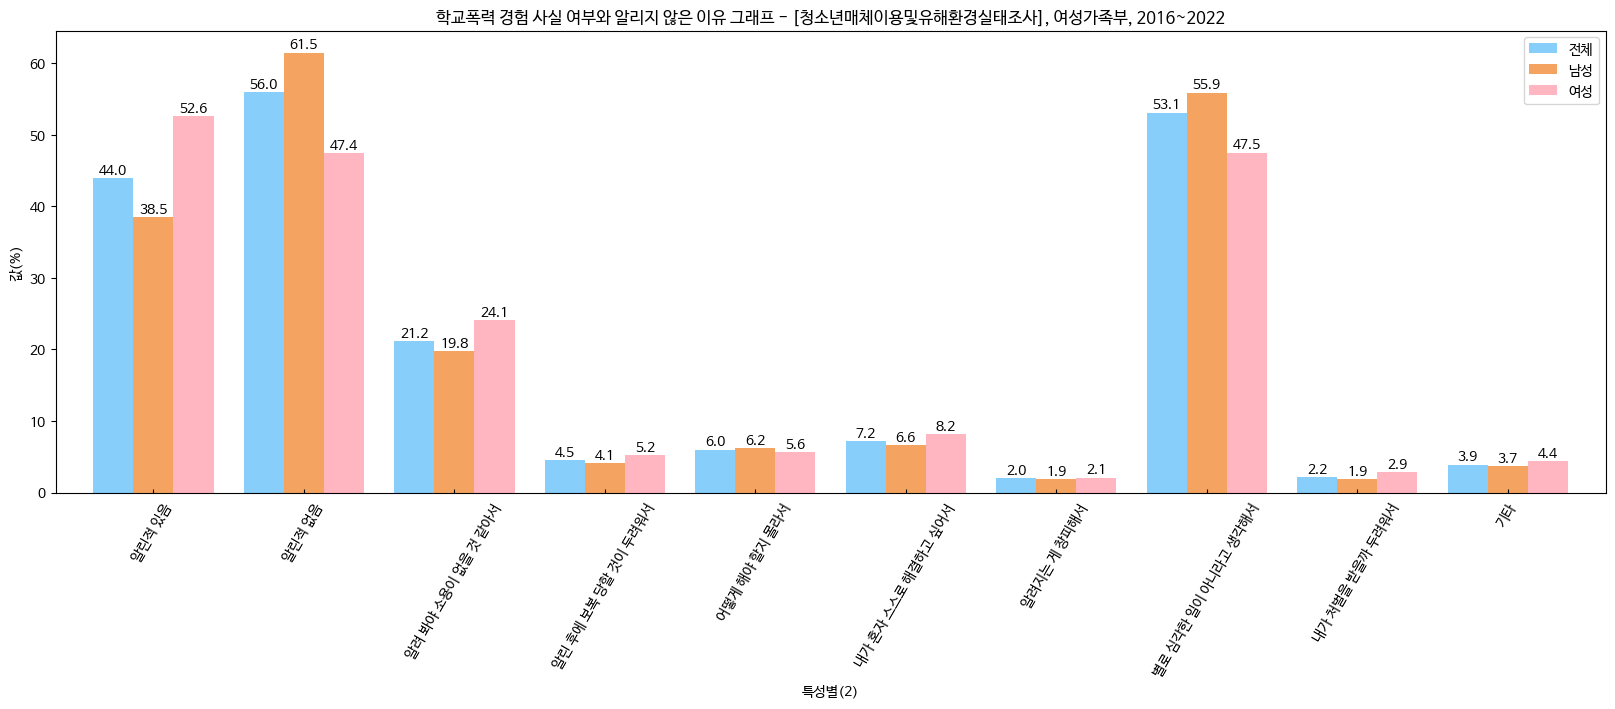

In [ ]:
colors = ['lightskyblue', 'sandybrown', 'lightpink']

# 그래프 그리기
ax = cd_df1.plot(kind='bar', figsize=(20, 6), width=0.8, color=colors)

# 그래프 꾸미기
plt.xlabel('특성별(2)')
plt.ylabel('값(%)')
plt.title('학교폭력 경험 사실 여부와 알리지 않은 이유 그래프 - [청소년매체이용및유해환경실태조사], 여성가족부, 2016~2022')
plt.xticks(rotation=60)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=10, right=True)
plt.legend()

# 그래프에 값 표시
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

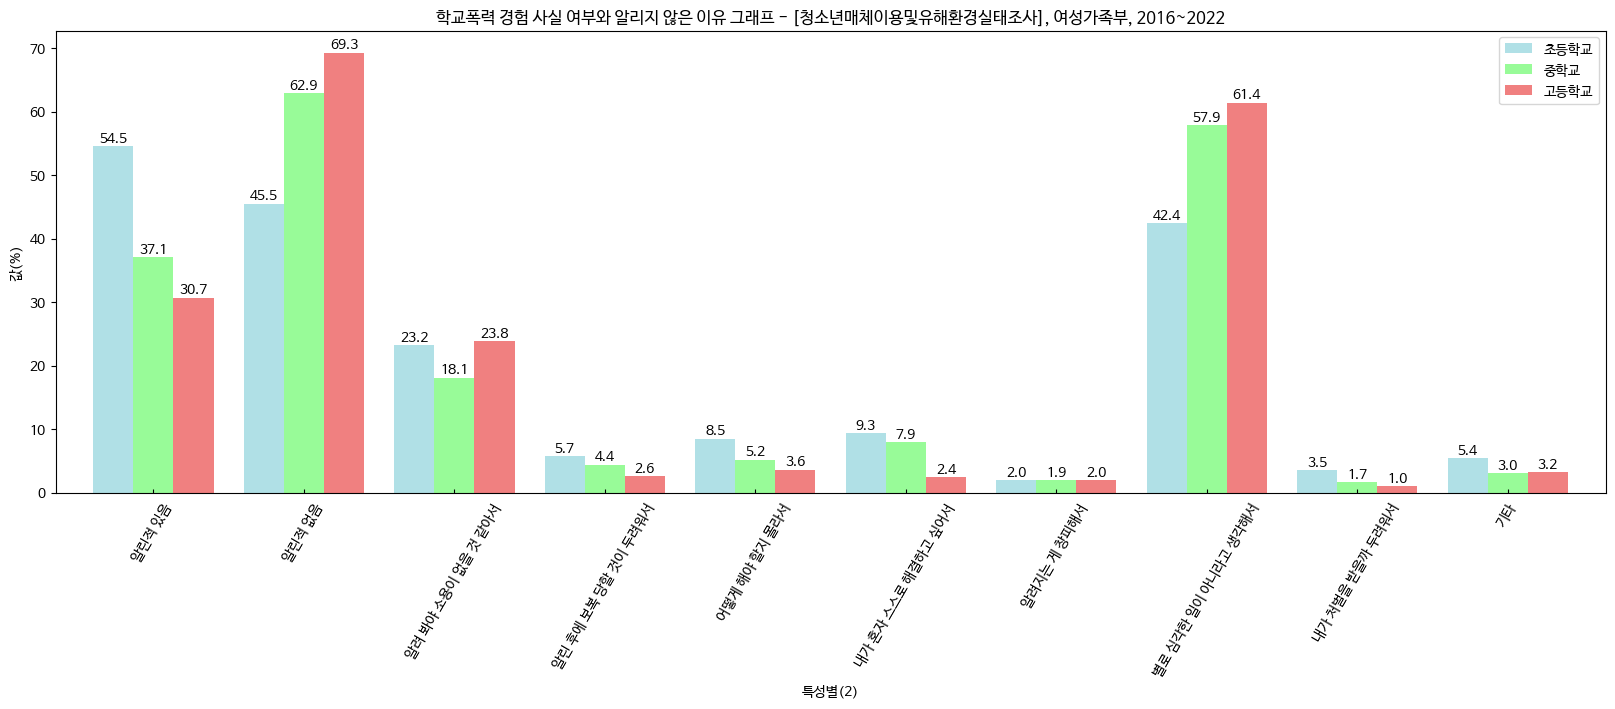

In [ ]:
cd_df2 = pd.DataFrame({'초등학교':[54.5, 45.5, 23.2,5.7,8.5,9.3,2.0,42.4,3.5,5.4],
                         '중학교':[37.1,	62.9,	18.1,	4.4,	5.2,	7.9,	1.9,	57.9,	1.7,	3.0],
                         '고등학교':[30.7,	69.3,	23.8,	2.6,	3.6,	2.4,	2.0,	61.4,	1.0,	3.2]})
cd_df2.index = ['알린적 있음', '알린적 없음', '알려 봐야 소용이 없을 것 같아서',
                '알린 후에 보복 당할 것이 두려워서', '어떻게 해야 할지 몰라서',
                '내가 혼자 스스로 해결하고 싶어서', '알려지는 게 창피해서',
                '별로 심각한 일이 아니라고 생각해서', '내가 처벌을 받을까 두려워서', '기타']
colors = ['powderblue', 'palegreen', 'lightcoral']

# 그래프 그리기
ax = cd_df2.plot(kind='bar', figsize=(20, 6), width=0.8, color=colors)

# 그래프 꾸미기
plt.xlabel('특성별(2)')
plt.ylabel('값(%)')
plt.title('학교폭력 경험 사실 여부와 알리지 않은 이유 그래프 - [청소년매체이용및유해환경실태조사], 여성가족부, 2016~2022')
plt.xticks(rotation=60)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=10, right=True)
plt.legend()

# 그래프에 값 표시
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

# 학교폭력 발생 시 대응 - 비전문적

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/2023DataAnaylze/학교폭력대응방법.csv',encoding = 'cp949',low_memory = False)
df2.head(10)

,특성별(1),특성별(2),학교에 알렸다,부모님 등 가족에게 알렸다,117 상담센터에 알렸다,경찰에 신고하였다,친구나 선배들과 상의하였다,부당하다고 생각했지만 참았다,별다른 생각 없이 그냥 넘어갔다,기타
0,전체,소계,30.4,66,3.4,2.3,8.6,13.5,9.9,1.6
1,성별,여성,46.1,55.1,1.8,1.3,16.3,16.5,10.8,1.2
2,성별,남성,20.9,72.6,4.4,2.9,3.9,11.6,9.4,1.9
3,연령별,9-11세,23.1,77.3,2.1,-,4.8,6.5,5.4,1.2
4,연령별,12-14세,42.6,47.4,7.9,2.6,15.2,21.4,26.8,2.9
5,연령별,15-17세,58.4,22,3.1,20.2,23.6,50.3,6.1,2.1
6,연령별,18-24세,59.8,20.7,-,-,-,19.5,19.5,-
7,자녀의 재학여부별,학교에 다님(재학 휴학 등),30.4,66,3.4,2.3,8.6,13.5,9.9,1.6
8,자녀의 재학여부별,학교에 다니지 않음(졸업 중퇴 등),-,-,-,-,-,-,-,-
9,자녀의 성장배경별,국내에서만 성장,30.2,67.8,2.8,2.1,8.5,11.9,10.6,1.7


In [ ]:
list(df2.columns)

['특성별(1)',
 '특성별(2)',
 '학교에 알렸다',
 '부모님 등 가족에게 알렸다',
 '117 상담센터에 알렸다',
 '경찰에 신고하였다',
 '친구나 선배들과 상의하였다',
 '부당하다고 생각했지만 참았다',
 '별다른 생각 없이 그냥 넘어갔다',
 '기타']

In [ ]:
cd_df2 = pd.DataFrame({'9-11세	':[23.1,	77.3,	2.1,	0,	4.8,	6.5+	5.4,	1.2],
                         '12-14세	':[42.6,	47.4,	7.9,	2.6,	15.2,	21.4+	26.8,	2.9],
                         '15-17세':[58.4,	22,	3.1,	20.2,	23.6,	56.1,	2.1],
                         '18-24세':[59.8,	20.7,	0, 0, 0,	39,	0]})
cd_df2.index = ['학교에 알렸다','부모님 등 가족에게 알렸다','117 상담센터에 알렸다','경찰에 신고하였다','친구나 선배들과 상의하였다','부당하다고 생각했지만 별다른 대응 없이 그냥 넘어갔다','기타']
cd_df2

,9-11세\t,12-14세\t,15-17세,18-24세
학교에 알렸다,23.1,42.6,58.4,59.8
부모님 등 가족에게 알렸다,77.3,47.4,22.0,20.7
117 상담센터에 알렸다,2.1,7.9,3.1,0.0
경찰에 신고하였다,0.0,2.6,20.2,0.0
친구나 선배들과 상의하였다,4.8,15.2,23.6,0.0
부당하다고 생각했지만 별다른 대응 없이 그냥 넘어갔다,11.9,48.2,56.1,39.0
기타,1.2,2.9,2.1,0.0


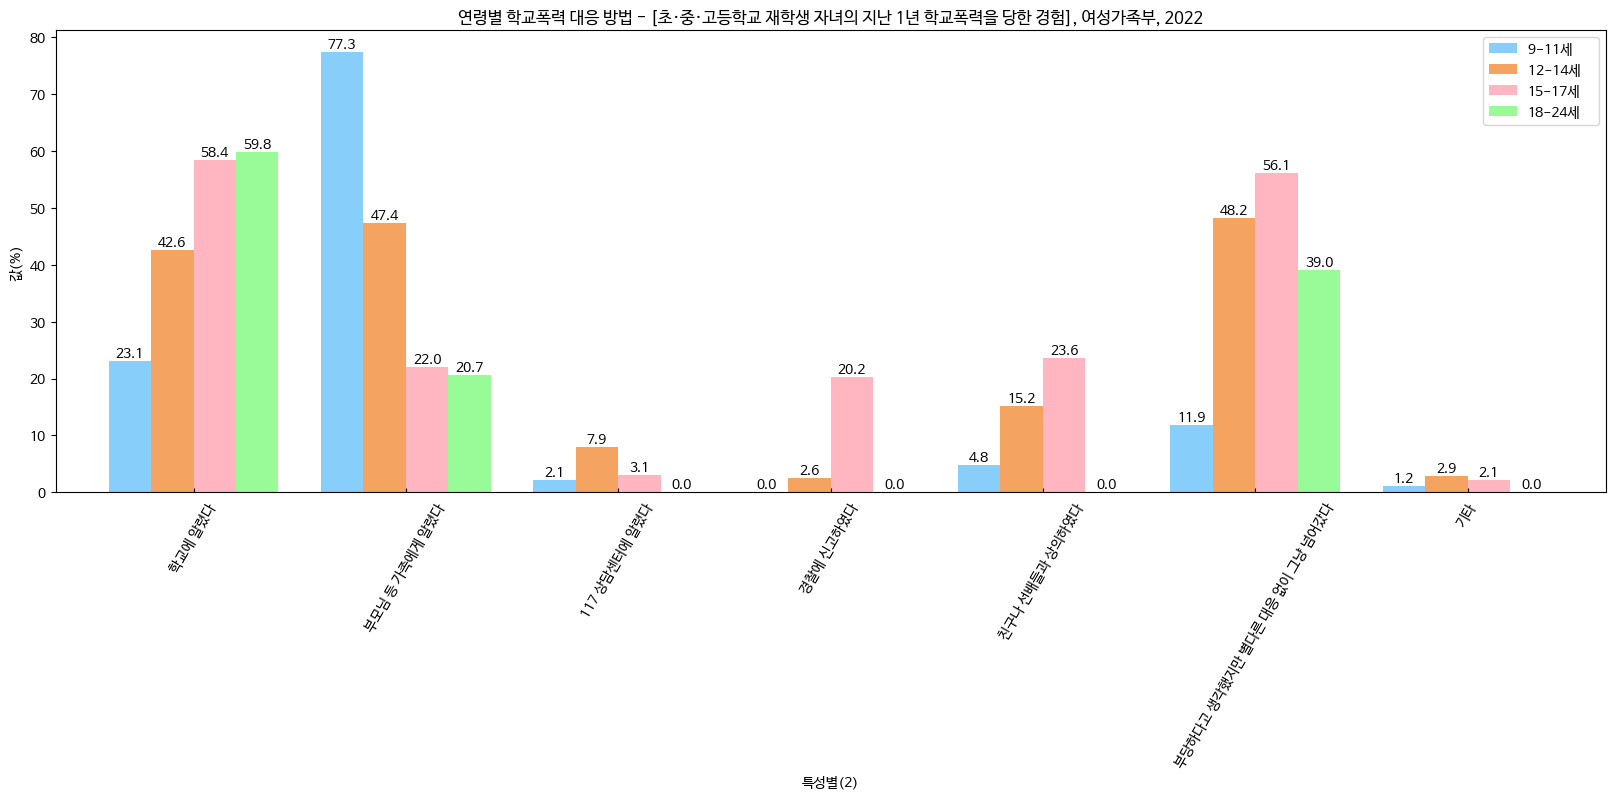

In [ ]:
colors = ['lightskyblue', 'sandybrown', 'lightpink','palegreen']

# 그래프 그리기
ax = cd_df2.plot(kind='bar', figsize=(20, 6), width=0.8, color=colors)

# 그래프 꾸미기
plt.xlabel('특성별(2)')
plt.ylabel('값(%)')
plt.title('연령별 학교폭력 대응 방법 - [초·중·고등학교 재학생 자녀의 지난 1년 학교폭력을 당한 경험], 여성가족부, 2022')
plt.xticks(rotation=60)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=10, right=True)
plt.legend()

# 그래프에 값 표시
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

# 사이버폭력이 범죄인지 모르는 비율이 의외로 높다.

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/2023DataAnaylze/사이버폭력_법적_처벌_인지_여부.csv',encoding = 'cp949',low_memory = False)
df3.head(10)

,특성별(1),특성별(2),들어본 적 있다,들어본 적 있고 내용도 알고 있다,잘 모른다
0,전체,소계,47.4,8.8,43.8
1,성별,남학생,46.1,10.6,43.3
2,성별,여학생,48.9,6.9,44.2
3,학령별,초등학교,43.2,8.7,48.0
4,학령별,중학교,52.8,8.6,38.7
5,학령별,고등학교,46.2,9.1,44.7
6,학교특성별,남학교,44.9,11.4,43.7
7,학교특성별,여학교,49.2,5.6,45.2
8,학교특성별,남녀공학,50.8,8.9,40.4
9,거주지역별,대도시,49.6,9.4,41.0


In [ ]:
# cd_df3 = df3.iloc[1:3, 1:]
# print(cd_df3)
# print()
# cd_df4 = df3.iloc[3:6, 1:]
# print(cd_df4)

     잘 모른다  들어본 적은 있다  내용까지 알고 있다
남학생   43.3       46.1        10.6
여학생   44.2       48.9         6.9


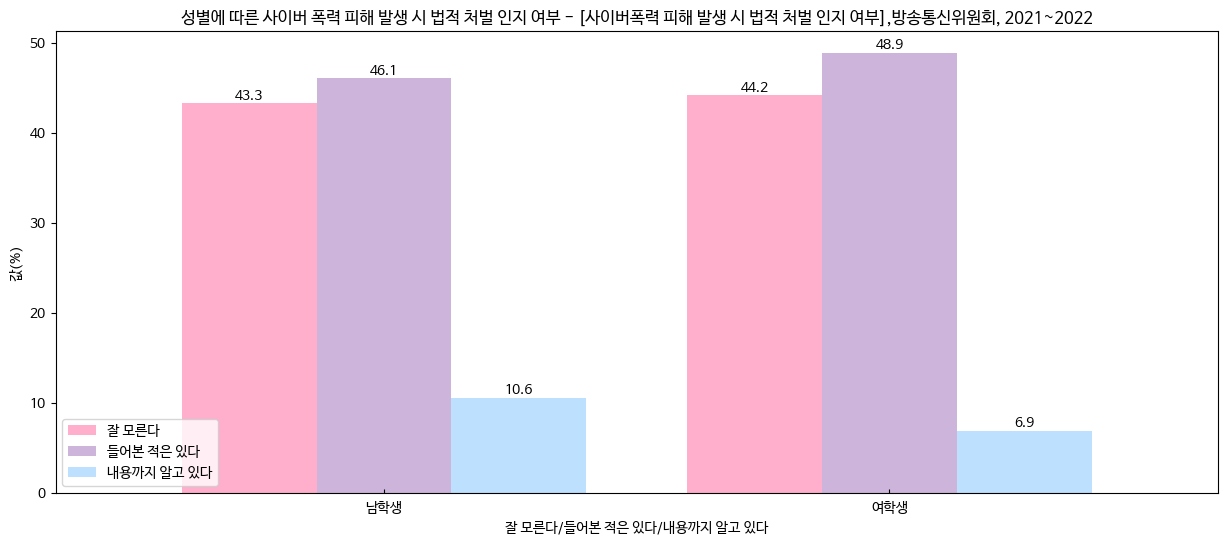

In [ ]:
cd_df3 = pd.DataFrame({'잘 모른다': [43.3, 44.2],
                       '들어본 적은 있다': [46.1, 48.9],
                       '내용까지 알고 있다': [10.6, 6.9]})
cd_df3.index = ['남학생', '여학생']

# 1열과 3열의 순서를 바꾸기
cd_df3 = cd_df3[['잘 모른다', '들어본 적은 있다', '내용까지 알고 있다']]

# 결과 출력
print(cd_df3)
colors = ['#ffafcc', '#cdb4db', '#bde0fe']

# 그래프 그리기
ax = cd_df3.plot(kind='bar', figsize=(15, 6), width=0.8, color=colors)

# 그래프 꾸미기
plt.xlabel('잘 모른다/들어본 적은 있다/내용까지 알고 있다')
plt.ylabel('값(%)')
plt.title('성별에 따른 사이버 폭력 피해 발생 시 법적 처벌 인지 여부 - [사이버폭력 피해 발생 시 법적 처벌 인지 여부],방송통신위원회, 2021~2022')
plt.xticks(rotation=0)
ax.set_xticklabels(['남학생', '여학생'])

plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=10, right=True)
plt.legend(loc='lower left')

# 그래프에 값 표시
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

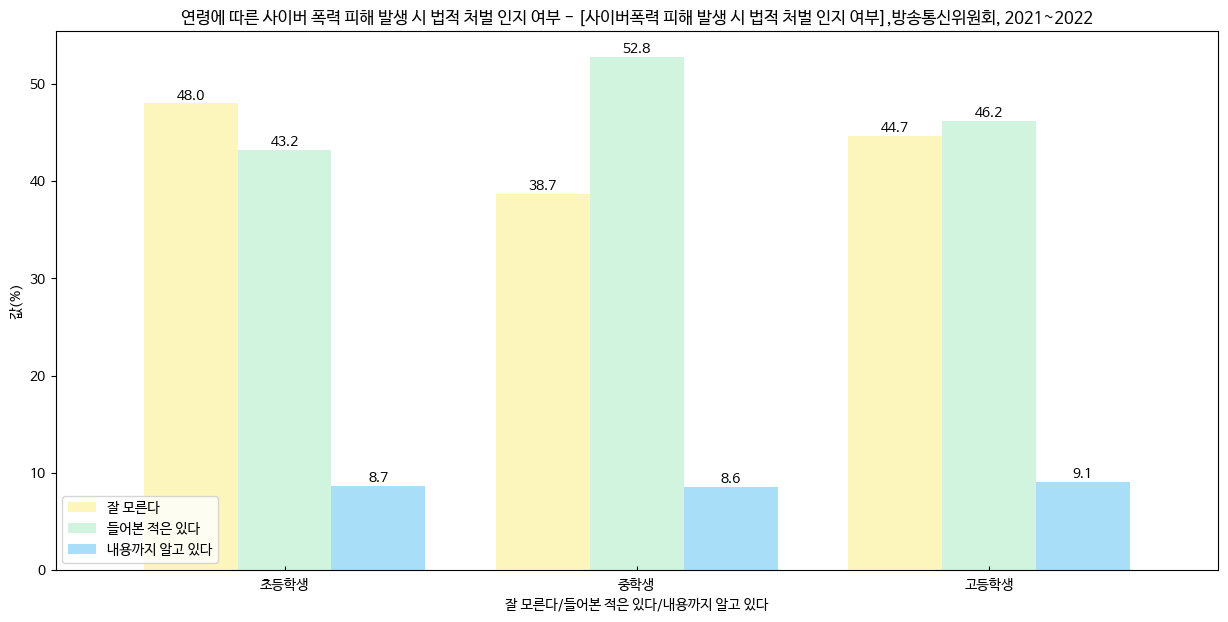

In [ ]:
cd_df4 = pd.DataFrame({'잘 모른다': [48.0, 38.7, 44.7],
                       '들어본 적은 있다': [43.2, 52.8, 46.2],
                       '내용까지 알고 있다': [8.7, 8.6, 9.1]})
cd_df4.index = ['초등학생', '중학생', '고등학생']
colors = ['#fcf6bd', '#d0f4de', '#a9def9']

# 그래프 그리기
ax = cd_df4.plot(kind='bar', figsize=(15, 7), width=0.8, color=colors)

# 그래프 꾸미기
plt.xlabel('잘 모른다/들어본 적은 있다/내용까지 알고 있다')
plt.ylabel('값(%)')
plt.title('연령에 따른 사이버 폭력 피해 발생 시 법적 처벌 인지 여부 - [사이버폭력 피해 발생 시 법적 처벌 인지 여부],방송통신위원회, 2021~2022')
plt.xticks(rotation=0)
ax.set_xticklabels(['초등학생', '중학생', '고등학생'])

plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=10, right=True)
plt.legend(loc='lower left')

# 그래프에 값 표시
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

# 학교폭력을 알렸을 때 도움이 된다고 응답한 수가 크게 많았다 - 자신이 학교폭력을 당했다는 것을 알리는 것이 중요

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/2023DataAnaylze/학교_폭력_피해_사실을_알린_것의_도움_정도_20230923004922.csv',encoding = 'cp949',low_memory = False)
df5.head(10)

,특성별(1),특성별(2),전체(사례수) (명),문제를 완전히 해결하는데 큰 도움이 됨 (%),문제가 완전히 해결되지는 않았으나 어느 정도 도움 됨 (%),문제가 해결되지 않았고 도움이 되지 않음 (%)
0,전체,소계,1115,28.0,54.6,17.4
1,성별,남자,596,35.2,46.8,18.0
2,성별,여자,519,19.7,63.5,16.8
3,남녀공학별,남학교,61,32.9,41.5,25.6
4,남녀공학별,여학교,40,24.3,51.7,24.0
5,남녀공학별,남녀공학,1014,27.8,55.5,16.7
6,학교급별,초등학교,635,30.3,56.0,13.6
7,학교급별,초등(5~6학년),425,29.8,57.3,13.0
8,학교급별,중학교,350,25.4,52.5,22.1
9,학교급별,고등학교,130,23.7,53.0,23.3


In [ ]:
list(df5.columns)

['특성별(1)',
 '특성별(2)',
 '전체(사례수) (명)',
 '문제를 완전히 해결하는데 큰 도움이 됨 (%)',
 '문제가 완전히 해결되지는 않았으나 어느 정도 도움 됨 (%)',
 '문제가 해결되지 않았고 도움이 되지 않음 (%)']

Text(0.5, 1.0, '학교폭력 사실을 알렸을 때 도움이 된 정도(남학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

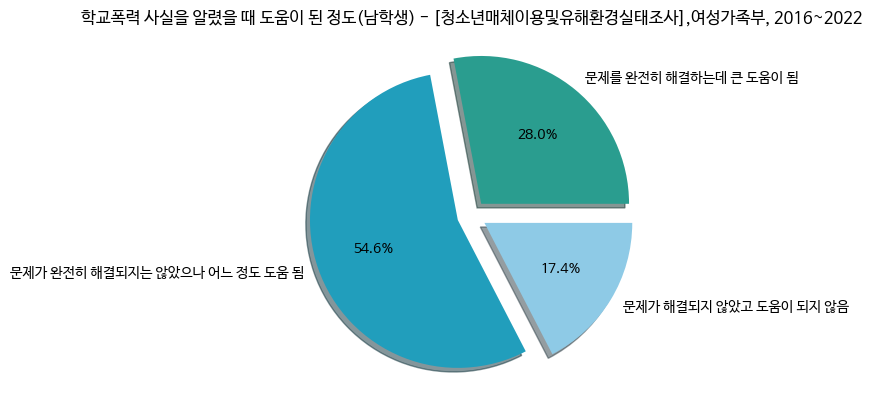

In [ ]:
val_male = [28.0, 54.6, 17.4]
my_colors = ['#2a9d8f', '#219ebc', '#8ecae6']

exp = [0.1, 0.1, 0.1]
use = ['문제를 완전히 해결하는데 큰 도움이 됨',	'문제가 완전히 해결되지는 않았으나 어느 정도 도움 됨', '문제가 해결되지 않았고 도움이 되지 않음']
plt.pie(val_male, labels=use, shadow = True,explode=exp, autopct='%.1f%%', colors = my_colors)
plt.title('학교폭력 사실을 알렸을 때 도움이 된 정도(남학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

Text(0.5, 1.0, '학교폭력 사실을 알렸을 때 도움이 된 정도(여학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

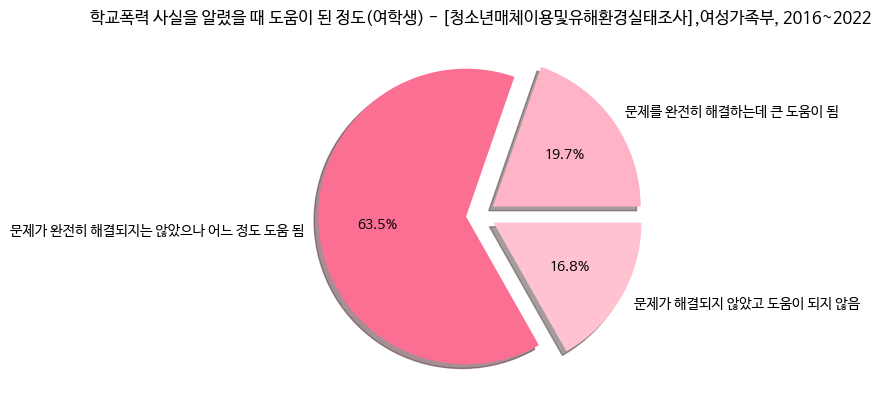

In [ ]:
val_female = [19.7,63.5,16.8]
my_colors = ['#ffb3c6','#fb6f92','#ffc2d1']

exp = [0.1, 0.1, 0.1]
use = ['문제를 완전히 해결하는데 큰 도움이 됨',	'문제가 완전히 해결되지는 않았으나 어느 정도 도움 됨', '문제가 해결되지 않았고 도움이 되지 않음']
plt.pie(val_female, labels=use, shadow = True,explode=exp, autopct='%.1f%%', colors = my_colors)
plt.title('학교폭력 사실을 알렸을 때 도움이 된 정도(여학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

Text(0.5, 1.0, '학교폭력 사실을 알렸을 때 도움이 된 정도(중학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

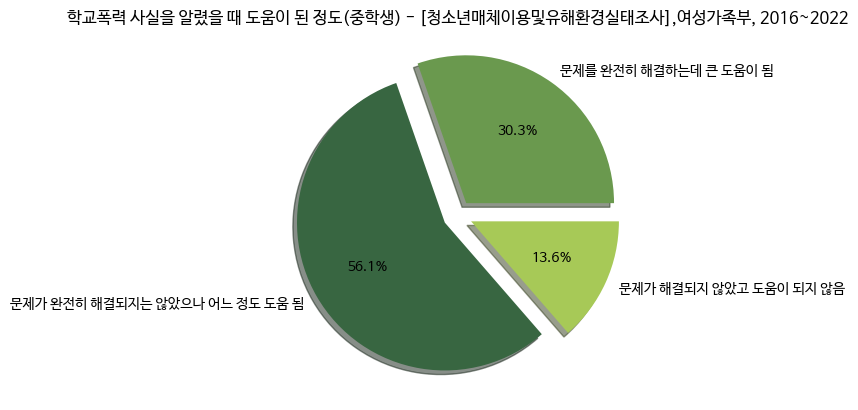

In [45]:
val_ele = [30.3,	56.0,	13.6]
my_colors = ['#6a994e','#386641', '#a7c957']

exp = [0.1, 0.1, 0.1]
use = ['문제를 완전히 해결하는데 큰 도움이 됨',	'문제가 완전히 해결되지는 않았으나 어느 정도 도움 됨', '문제가 해결되지 않았고 도움이 되지 않음']
plt.pie(val_ele, labels=use, shadow = True,explode=exp, autopct='%.1f%%', colors = my_colors)
plt.title('학교폭력 사실을 알렸을 때 도움이 된 정도(중학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

Text(0.5, 1.0, '학교폭력 사실을 알렸을 때 도움이 된 정도(중학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

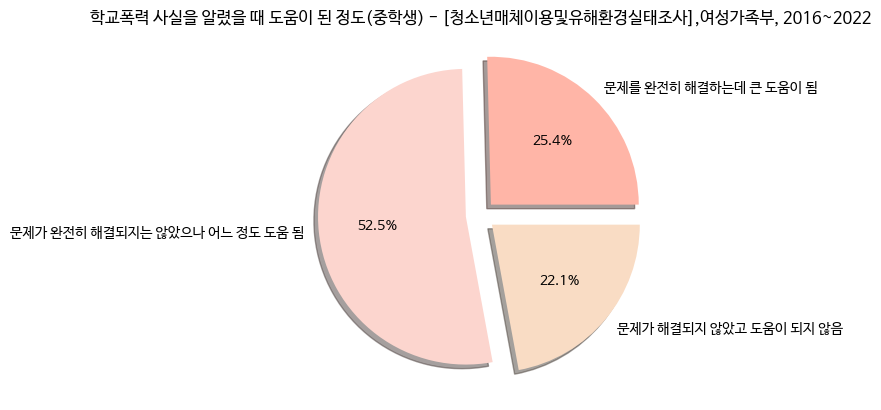

In [ ]:
val_mid = [25.4,	52.5,	22.1]
my_colors = ['#ffb5a7','#fcd5ce', '#f9dcc4']

exp = [0.1, 0.1, 0.1]
use = ['문제를 완전히 해결하는데 큰 도움이 됨',	'문제가 완전히 해결되지는 않았으나 어느 정도 도움 됨', '문제가 해결되지 않았고 도움이 되지 않음']
plt.pie(val_mid, labels=use, shadow = True,explode=exp, autopct='%.1f%%', colors = my_colors)
plt.title('학교폭력 사실을 알렸을 때 도움이 된 정도(중학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

Text(0.5, 1.0, '학교폭력 사실을 알렸을 때 도움이 된 정도(고등학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')

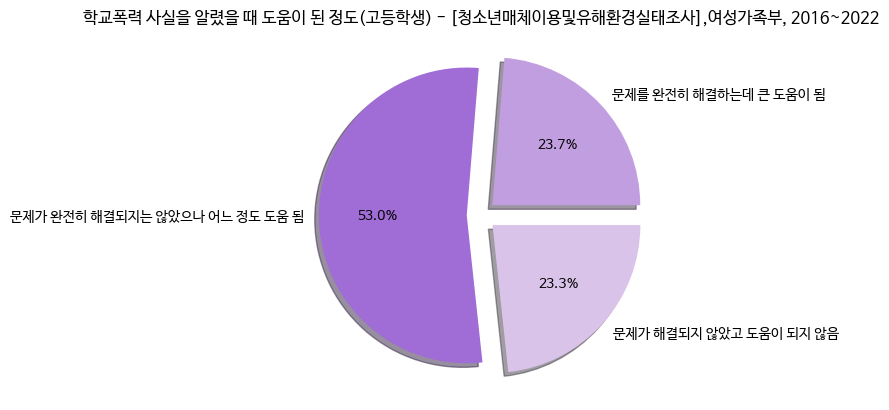

In [ ]:
val_high = [23.7,	53.0,	23.3]
my_colors = ['#c19ee0','#a06cd5', '#dac3e8']

exp = [0.1, 0.1, 0.1]
use = ['문제를 완전히 해결하는데 큰 도움이 됨',	'문제가 완전히 해결되지는 않았으나 어느 정도 도움 됨', '문제가 해결되지 않았고 도움이 되지 않음']
plt.pie(val_high, labels=use, shadow = True,explode=exp, autopct='%.1f%%', colors = my_colors)
plt.title('학교폭력 사실을 알렸을 때 도움이 된 정도(고등학생) - [청소년매체이용및유해환경실태조사],여성가족부, 2016~2022')